In [1]:
"""
Train convex LassoNet models on a synthetic classification dataset using convex optimization.
"""

import sys
sys.path.append("..")

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from convex_nn.optimize import optimize_path
from convex_nn.private.utils.data import gen_classification_data
from convex_nn.models import ConvexGatedReLU, ConvexReLU
from convex_nn.solvers import RFISTA, AL
from convex_nn.regularizers import NeuronGL1
from convex_nn.metrics import Metrics
from convex_nn.activations import sample_gate_vectors

In [3]:
# Generate realizable synthetic classification problem (ie. Figure 1)
n_train = 250
n_test = 250
d = 50
hidden_units = 100
kappa = 10  # condition number

(X_train, y_train), (X_test, y_test) = gen_classification_data(123, n_train, n_test, d, hidden_units, kappa)

In [8]:
# Instantiate convex model and other options.
max_neurons = 500
lambda_path = [0.1, 0.01, 0.001, 0.0001, 0.00001]

G = sample_gate_vectors(np.random.default_rng(123), d, max_neurons)
model = ConvexGatedReLU(G)
solver = RFISTA(model, tol=1e-6)
path = [NeuronGL1(lam) for lam in lambda_path]
metrics = Metrics(metric_freq=25, model_loss=True, train_accuracy=True, train_mse=True, test_mse=True, test_accuracy=True, neuron_sparsity=True)

In [13]:
gated_model_path, gated_metric_path = optimize_path(
    model,
    solver,
    path,
    metrics,
    X_train, 
    y_train, 
    X_test, 
    y_test,
    verbose=True,
)

INFO:convex_nn:Pre-Optimization Metrics: Train Set objective: 0.5, Train Set grad_norm: 0.0, Train Set base_objective: 0.5, Train Set accuracy: 0.0, Train Set nc_squared_error: 0.5, Test Set nc_accuracy: 0.0, Test Set squared_error: 0.5, group_sparsity: 1.0, 


fista:   0%|          | 0/10000 [00:00<?, ?it/s]

INFO:convex_nn:Termination criterion satisfied at iteration 0/10000. Exiting optimization loop.
INFO:convex_nn:Post-Optimization Metrics: Train Set objective: 0.5, Train Set grad_norm: 0.0, Train Set base_objective: 0.5, Train Set accuracy: 0.0, Train Set nc_squared_error: 0.5, Test Set nc_accuracy: 0.0, Test Set squared_error: 0.5, group_sparsity: 1.0, 
INFO:convex_nn:Pre-Optimization Metrics: Train Set objective: 0.5, Train Set grad_norm: 0.22960442304611206, Train Set base_objective: 0.5, Train Set accuracy: 0.0, Train Set nc_squared_error: 0.5, Test Set nc_accuracy: 0.0, Test Set squared_error: 0.5, group_sparsity: 1.0, 


Train Set objective: 0.5, Train Set grad_norm: 0.0, Train Set base_objective: 0.5, Train Set accuracy: 0.0, Train Set nc_squared_error: 0.5, Test Set nc_accuracy: 0.0, Test Set squared_error: 0.5, group_sparsity: 1.0, 


fista:   0%|          | 0/10000 [00:00<?, ?it/s]

Train Set objective: 0.5, Train Set grad_norm: 0.22960442304611206, Train Set base_objective: 0.5, Train Set accuracy: 0.0, Train Set nc_squared_error: 0.5, Test Set nc_accuracy: 0.0, Test Set squared_error: 0.5, group_sparsity: 1.0, 
Train Set objective: 0.29109334564208983, Train Set grad_norm: 5.0199047109344974e-05, Train Set base_objective: 0.29109334564208983, Train Set accuracy: 1.0, Train Set nc_squared_error: 0.09102650451660156, Test Set nc_accuracy: 0.932, Test Set squared_error: 0.20439875793457032, group_sparsity: 0.508, 
Train Set objective: 0.28622209930419923, Train Set grad_norm: 1.2994277085454087e-06, Train Set base_objective: 0.28622209930419923, Train Set accuracy: 1.0, Train Set nc_squared_error: 0.0889329833984375, Test Set nc_accuracy: 0.932, Test Set squared_error: 0.20372413635253905, group_sparsity: 0.828, 


INFO:convex_nn:Termination criterion satisfied at iteration 53/10000. Exiting optimization loop.
INFO:convex_nn:Post-Optimization Metrics: Train Set objective: 0.2860235786437988, Train Set grad_norm: 9.989237241825322e-07, Train Set base_objective: 0.2860235786437988, Train Set accuracy: 1.0, Train Set nc_squared_error: 0.08867847442626953, Test Set nc_accuracy: 0.936, Test Set squared_error: 0.204056396484375, group_sparsity: 0.84, 
INFO:convex_nn:Pre-Optimization Metrics: Train Set objective: 0.10841298484802246, Train Set grad_norm: 0.03377726301550865, Train Set base_objective: 0.10841298484802246, Train Set accuracy: 1.0, Train Set nc_squared_error: 0.08867847442626953, Test Set nc_accuracy: 0.936, Test Set squared_error: 0.204056396484375, group_sparsity: 0.84, 


fista:   0%|          | 0/10000 [00:00<?, ?it/s]

Train Set objective: 0.10841298484802246, Train Set grad_norm: 0.03377726301550865, Train Set base_objective: 0.10841298484802246, Train Set accuracy: 1.0, Train Set nc_squared_error: 0.08867847442626953, Test Set nc_accuracy: 0.936, Test Set squared_error: 0.204056396484375, group_sparsity: 0.84, 
Train Set objective: 0.04228387260437012, Train Set grad_norm: 1.4517008821712807e-05, Train Set base_objective: 0.04228387260437012, Train Set accuracy: 1.0, Train Set nc_squared_error: 0.002990910530090332, Test Set nc_accuracy: 0.92, Test Set squared_error: 0.15146914672851564, group_sparsity: 0.0, 


INFO:convex_nn:Termination criterion satisfied at iteration 70/10000. Exiting optimization loop.
INFO:convex_nn:Post-Optimization Metrics: Train Set objective: 0.04045914006233215, Train Set grad_norm: 9.788054740056396e-07, Train Set base_objective: 0.04045914006233215, Train Set accuracy: 1.0, Train Set nc_squared_error: 0.0019117614030838012, Test Set nc_accuracy: 0.932, Test Set squared_error: 0.1537865447998047, group_sparsity: 0.406, 
INFO:convex_nn:Pre-Optimization Metrics: Train Set objective: 0.005766499376296997, Train Set grad_norm: 0.0003566851082723588, Train Set base_objective: 0.005766499376296997, Train Set accuracy: 1.0, Train Set nc_squared_error: 0.0019117614030838012, Test Set nc_accuracy: 0.932, Test Set squared_error: 0.1537865447998047, group_sparsity: 0.406, 


Train Set objective: 0.04093592691421509, Train Set grad_norm: 3.4917954963020748e-06, Train Set base_objective: 0.04093592691421509, Train Set accuracy: 1.0, Train Set nc_squared_error: 0.002031823635101318, Test Set nc_accuracy: 0.928, Test Set squared_error: 0.153126708984375, group_sparsity: 0.198, 


fista:   0%|          | 0/10000 [00:00<?, ?it/s]

INFO:convex_nn:Termination criterion satisfied at iteration 13/10000. Exiting optimization loop.
INFO:convex_nn:Post-Optimization Metrics: Train Set objective: 0.004277318606898189, Train Set grad_norm: 9.925014410328004e-07, Train Set base_objective: 0.004277318606898189, Train Set accuracy: 1.0, Train Set nc_squared_error: 2.6224538683891295e-05, Test Set nc_accuracy: 0.932, Test Set squared_error: 0.15355279541015626, group_sparsity: 0.0, 
INFO:convex_nn:Pre-Optimization Metrics: Train Set objective: 0.00045133395723998546, Train Set grad_norm: 2.8360245778458193e-06, Train Set base_objective: 0.00045133395723998546, Train Set accuracy: 1.0, Train Set nc_squared_error: 2.6224538683891295e-05, Test Set nc_accuracy: 0.932, Test Set squared_error: 0.15355279541015626, group_sparsity: 0.0, 


Train Set objective: 0.005766499376296997, Train Set grad_norm: 0.0003566851082723588, Train Set base_objective: 0.005766499376296997, Train Set accuracy: 1.0, Train Set nc_squared_error: 0.0019117614030838012, Test Set nc_accuracy: 0.932, Test Set squared_error: 0.1537865447998047, group_sparsity: 0.406, 


fista:   0%|          | 0/10000 [00:00<?, ?it/s]

Train Set objective: 0.00045133395723998546, Train Set grad_norm: 2.8360245778458193e-06, Train Set base_objective: 0.00045133395723998546, Train Set accuracy: 1.0, Train Set nc_squared_error: 2.6224538683891295e-05, Test Set nc_accuracy: 0.932, Test Set squared_error: 0.15355279541015626, group_sparsity: 0.0, 


INFO:convex_nn:Termination criterion satisfied at iteration 4/10000. Exiting optimization loop.
INFO:convex_nn:Post-Optimization Metrics: Train Set objective: 0.0004365374945476651, Train Set grad_norm: 7.122026204342546e-07, Train Set base_objective: 0.0004365374945476651, Train Set accuracy: 1.0, Train Set nc_squared_error: 9.192812256515026e-06, Test Set nc_accuracy: 0.932, Test Set squared_error: 0.15355484008789064, group_sparsity: 0.0, 


In [16]:
model = ConvexReLU(G)
solver = AL(model)

relu_model_path, relu_metric_path = optimize_path(
    model,
    solver,
    path,
    metrics,
    X_train, 
    y_train, 
    X_test, 
    y_test,
    verbose=True,
)

INFO:convex_nn:Pre-Optimization Metrics: Train Set objective: 0.5, Train Set grad_norm: 0.0, Train Set base_objective: 0.5, Train Set accuracy: 0.0, Train Set nc_squared_error: 0.5, Test Set nc_accuracy: 0.0, Test Set squared_error: 0.5, group_sparsity: 1.0, 


Outer al:   0%|          | 0/10000 [00:00<?, ?it/s]

Inner al:   0%|          | 0/10000 [00:00<?, ?it/s]

INFO:convex_nn:*Outer* termination criterion satisfied at iteration 0/10000. Exiting *outer* optimization loop.
INFO:convex_nn:Post-Optimization Metrics: Train Set objective: 0.5, Train Set grad_norm: 0.0, Train Set base_objective: 0.5, Train Set accuracy: 0.0, Train Set nc_squared_error: 0.5, Test Set nc_accuracy: 0.0, Test Set squared_error: 0.5, group_sparsity: 1.0, 
INFO:convex_nn:Pre-Optimization Metrics: Train Set objective: 0.5, Train Set grad_norm: 0.45920881628990173, Train Set base_objective: 0.5, Train Set accuracy: 0.0, Train Set nc_squared_error: 0.5, Test Set nc_accuracy: 0.0, Test Set squared_error: 0.5, group_sparsity: 1.0, 


Train Set objective: 0.5, Train Set grad_norm: 0.0, Train Set base_objective: 0.5, Train Set accuracy: 0.0, Train Set nc_squared_error: 0.5, Test Set nc_accuracy: 0.0, Test Set squared_error: 0.5, group_sparsity: 1.0, 


Outer al:   0%|          | 0/10000 [00:00<?, ?it/s]

Inner al:   0%|          | 0/10000 [00:00<?, ?it/s]

Train Set objective: 0.5, Train Set grad_norm: 0.45920881628990173, Train Set base_objective: 0.5, Train Set accuracy: 0.0, Train Set nc_squared_error: 0.5, Test Set nc_accuracy: 0.0, Test Set squared_error: 0.5, group_sparsity: 1.0, 


INFO:convex_nn:*Inner* termination criterion satisfied at iteration 19/10000. Exiting *inner* optimization loop.


Inner al:   0%|          | 0/10000 [00:00<?, ?it/s]

Train Set objective: 0.3322597232982516, Train Set grad_norm: 0.0007868921966291964, Train Set base_objective: 0.3242309226989746, Train Set accuracy: 0.92, Train Set nc_squared_error: 0.14883682250976563, Test Set nc_accuracy: 0.916, Test Set squared_error: 0.20113021850585938, group_sparsity: 0.007, 
Train Set objective: 0.3274540278017521, Train Set grad_norm: 0.00010960260988213122, Train Set base_objective: 0.32053919982910156, Train Set accuracy: 0.92, Train Set nc_squared_error: 0.15237957763671875, Test Set nc_accuracy: 0.916, Test Set squared_error: 0.20703152465820313, group_sparsity: 0.004, 
Train Set objective: 0.3236496490128339, Train Set grad_norm: 5.971740392851643e-05, Train Set base_objective: 0.3184364624023438, Train Set accuracy: 0.912, Train Set nc_squared_error: 0.1478083953857422, Test Set nc_accuracy: 0.916, Test Set squared_error: 0.20494947814941405, group_sparsity: 0.012, 
Train Set objective: 0.3212292219437659, Train Set grad_norm: 4.541490852716379e-05, T

INFO:convex_nn:*Inner* termination criterion satisfied at iteration 255/10000. Exiting *inner* optimization loop.


Train Set objective: 0.3174518187046051, Train Set grad_norm: 1.3207394431447028e-06, Train Set base_objective: 0.3149084587097168, Train Set accuracy: 0.928, Train Set nc_squared_error: 0.143663818359375, Test Set nc_accuracy: 0.916, Test Set squared_error: 0.21345712280273438, group_sparsity: 0.034, 


Inner al:   0%|          | 0/10000 [00:00<?, ?it/s]

Train Set objective: 0.3174436659142375, Train Set grad_norm: 9.612058420316316e-07, Train Set base_objective: 0.3148982467651367, Train Set accuracy: 0.928, Train Set nc_squared_error: 0.14368704223632814, Test Set nc_accuracy: 0.916, Test Set squared_error: 0.21348419189453124, group_sparsity: 0.034, 
Train Set objective: 0.32317586176469926, Train Set grad_norm: 6.111689799581654e-06, Train Set base_objective: 0.31891213989257816, Train Set accuracy: 0.896, Train Set nc_squared_error: 0.1473059539794922, Test Set nc_accuracy: 0.916, Test Set squared_error: 0.215635986328125, group_sparsity: 0.008, 
Train Set objective: 0.32297130398266016, Train Set grad_norm: 1.7770930753613357e-06, Train Set base_objective: 0.3191533203125, Train Set accuracy: 0.896, Train Set nc_squared_error: 0.14626974487304686, Test Set nc_accuracy: 0.916, Test Set squared_error: 0.21486581420898437, group_sparsity: 0.012, 


INFO:convex_nn:*Inner* termination criterion satisfied at iteration 72/10000. Exiting *inner* optimization loop.


Inner al:   0%|          | 0/10000 [00:00<?, ?it/s]

Train Set objective: 0.3228705041501671, Train Set grad_norm: 9.518853971712815e-07, Train Set base_objective: 0.31936350631713867, Train Set accuracy: 0.896, Train Set nc_squared_error: 0.14539913940429688, Test Set nc_accuracy: 0.916, Test Set squared_error: 0.2143210754394531, group_sparsity: 0.019, 


INFO:convex_nn:*Inner* termination criterion satisfied at iteration 22/10000. Exiting *inner* optimization loop.


Inner al:   0%|          | 0/10000 [00:00<?, ?it/s]

Train Set objective: 0.32399356757104397, Train Set grad_norm: 9.848318995864247e-07, Train Set base_objective: 0.32001408767700196, Train Set accuracy: 0.896, Train Set nc_squared_error: 0.14630441284179688, Test Set nc_accuracy: 0.916, Test Set squared_error: 0.21504478454589843, group_sparsity: 0.012, 


INFO:convex_nn:*Inner* termination criterion satisfied at iteration 33/10000. Exiting *inner* optimization loop.


Train Set objective: 0.32448425147682425, Train Set grad_norm: 1.135342358793423e-06, Train Set base_objective: 0.32027622222900387, Train Set accuracy: 0.896, Train Set nc_squared_error: 0.14670889282226562, Test Set nc_accuracy: 0.916, Test Set squared_error: 0.21546539306640625, group_sparsity: 0.031, 


Inner al:   0%|          | 0/10000 [00:00<?, ?it/s]

Train Set objective: 0.32446488324925304, Train Set grad_norm: 9.826827636061353e-07, Train Set base_objective: 0.3203056678771973, Train Set accuracy: 0.896, Train Set nc_squared_error: 0.14661273193359375, Test Set nc_accuracy: 0.916, Test Set squared_error: 0.21542523193359375, group_sparsity: 0.037, 


INFO:convex_nn:*Outer* termination criterion satisfied at iteration 5/10000. Exiting *outer* optimization loop.
INFO:convex_nn:Post-Optimization Metrics: Train Set objective: 0.3246374506726861, Train Set grad_norm: 9.90476451079303e-07, Train Set base_objective: 0.32040927505493166, Train Set accuracy: 0.896, Train Set nc_squared_error: 0.1466988067626953, Test Set nc_accuracy: 0.916, Test Set squared_error: 0.21554232788085936, group_sparsity: 0.037, 
INFO:convex_nn:Pre-Optimization Metrics: Train Set objective: 0.168269780613482, Train Set grad_norm: 0.08095266669988632, Train Set base_objective: 0.16404160499572754, Train Set accuracy: 0.896, Train Set nc_squared_error: 0.1466988067626953, Test Set nc_accuracy: 0.916, Test Set squared_error: 0.21554232788085936, group_sparsity: 0.037, 


Outer al:   0%|          | 0/10000 [00:00<?, ?it/s]

Inner al:   0%|          | 0/10000 [00:00<?, ?it/s]

Train Set objective: 0.168269780613482, Train Set grad_norm: 0.08095266669988632, Train Set base_objective: 0.16404160499572754, Train Set accuracy: 0.896, Train Set nc_squared_error: 0.1466988067626953, Test Set nc_accuracy: 0.916, Test Set squared_error: 0.21554232788085936, group_sparsity: 0.037, 


INFO:convex_nn:*Inner* termination criterion satisfied at iteration 16/10000. Exiting *inner* optimization loop.


Inner al:   0%|          | 0/10000 [00:00<?, ?it/s]

Train Set objective: 0.1035745464488864, Train Set grad_norm: 0.0008822645177133381, Train Set base_objective: 0.093962646484375, Train Set accuracy: 1.0, Train Set nc_squared_error: 0.0604752197265625, Test Set nc_accuracy: 0.92, Test Set squared_error: 0.14683720397949218, group_sparsity: 0.0, 
Train Set objective: 0.09187632239237428, Train Set grad_norm: 0.00012222085206303746, Train Set base_objective: 0.08548003387451172, Train Set accuracy: 1.0, Train Set nc_squared_error: 0.036282852172851564, Test Set nc_accuracy: 0.928, Test Set squared_error: 0.14372584533691407, group_sparsity: 0.0, 
Train Set objective: 0.08632696440815926, Train Set grad_norm: 9.438802226213738e-05, Train Set base_objective: 0.08238976097106934, Train Set accuracy: 1.0, Train Set nc_squared_error: 0.023633432388305665, Test Set nc_accuracy: 0.932, Test Set squared_error: 0.1421345672607422, group_sparsity: 0.0, 
Train Set objective: 0.08354042022675276, Train Set grad_norm: 9.782996494323015e-05, Train Se

INFO:convex_nn:*Inner* termination criterion satisfied at iteration 436/10000. Exiting *inner* optimization loop.


Inner al:   0%|          | 0/10000 [00:00<?, ?it/s]

Train Set objective: 0.07591924947779627, Train Set grad_norm: 9.608039590602857e-07, Train Set base_objective: 0.07414108657836914, Train Set accuracy: 1.0, Train Set nc_squared_error: 0.015340015411376954, Test Set nc_accuracy: 0.936, Test Set squared_error: 0.14165724182128905, group_sparsity: 0.0, 


INFO:convex_nn:*Inner* termination criterion satisfied at iteration 32/10000. Exiting *inner* optimization loop.


Train Set objective: 0.07727591192908585, Train Set grad_norm: 1.3938259826318244e-06, Train Set base_objective: 0.07499692344665528, Train Set accuracy: 1.0, Train Set nc_squared_error: 0.016100366592407225, Test Set nc_accuracy: 0.94, Test Set squared_error: 0.14137326049804688, group_sparsity: 0.0, 


Inner al:   0%|          | 0/10000 [00:00<?, ?it/s]

Train Set objective: 0.07726401435025036, Train Set grad_norm: 9.765144568518735e-07, Train Set base_objective: 0.07499942970275879, Train Set accuracy: 1.0, Train Set nc_squared_error: 0.016102754592895507, Test Set nc_accuracy: 0.94, Test Set squared_error: 0.14140023803710938, group_sparsity: 0.0, 


INFO:convex_nn:*Inner* termination criterion satisfied at iteration 15/10000. Exiting *inner* optimization loop.


Inner al:   0%|          | 0/10000 [00:00<?, ?it/s]

Train Set objective: 0.0777276056818664, Train Set grad_norm: 9.728610166348517e-07, Train Set base_objective: 0.07519307136535644, Train Set accuracy: 1.0, Train Set nc_squared_error: 0.016281789779663085, Test Set nc_accuracy: 0.94, Test Set squared_error: 0.1413056640625, group_sparsity: 0.003, 


INFO:convex_nn:*Inner* termination criterion satisfied at iteration 21/10000. Exiting *inner* optimization loop.


Inner al:   0%|          | 0/10000 [00:00<?, ?it/s]

INFO:convex_nn:*Inner* termination criterion satisfied at iteration 7/10000. Exiting *inner* optimization loop.


Train Set objective: 0.07798038505204022, Train Set grad_norm: 9.635798505769344e-07, Train Set base_objective: 0.07528955268859863, Train Set accuracy: 1.0, Train Set nc_squared_error: 0.016387853622436523, Test Set nc_accuracy: 0.94, Test Set squared_error: 0.141268310546875, group_sparsity: 0.0, 


Inner al:   0%|          | 0/10000 [00:00<?, ?it/s]

Train Set objective: 0.07813331593759358, Train Set grad_norm: 9.56498297455255e-07, Train Set base_objective: 0.07532747268676758, Train Set accuracy: 1.0, Train Set nc_squared_error: 0.01642075538635254, Test Set nc_accuracy: 0.94, Test Set squared_error: 0.141248291015625, group_sparsity: 0.0, 


INFO:convex_nn:*Inner* termination criterion satisfied at iteration 7/10000. Exiting *inner* optimization loop.


Inner al:   0%|          | 0/10000 [00:00<?, ?it/s]

INFO:convex_nn:*Outer* termination criterion satisfied at iteration 7/10000. Exiting *outer* optimization loop.
INFO:convex_nn:Post-Optimization Metrics: Train Set objective: 0.07833432834781706, Train Set grad_norm: 9.391380899614887e-07, Train Set base_objective: 0.07537517356872558, Train Set accuracy: 1.0, Train Set nc_squared_error: 0.016469722747802736, Test Set nc_accuracy: 0.94, Test Set squared_error: 0.1412243957519531, group_sparsity: 0.0, 
INFO:convex_nn:Pre-Optimization Metrics: Train Set objective: 0.025298996621742842, Train Set grad_norm: 0.0008100083214230835, Train Set base_objective: 0.022339841842651365, Train Set accuracy: 1.0, Train Set nc_squared_error: 0.016469722747802736, Test Set nc_accuracy: 0.94, Test Set squared_error: 0.1412243957519531, group_sparsity: 0.0, 


Train Set objective: 0.07824819470942021, Train Set grad_norm: 9.877451248030411e-07, Train Set base_objective: 0.07535494613647462, Train Set accuracy: 1.0, Train Set nc_squared_error: 0.01644815444946289, Test Set nc_accuracy: 0.94, Test Set squared_error: 0.141234130859375, group_sparsity: 0.0, 


Outer al:   0%|          | 0/10000 [00:00<?, ?it/s]

Inner al:   0%|          | 0/10000 [00:00<?, ?it/s]

INFO:convex_nn:*Inner* termination criterion satisfied at iteration 0/10000. Exiting *inner* optimization loop.


Train Set objective: 0.025298996621742842, Train Set grad_norm: 0.0008100083214230835, Train Set base_objective: 0.022339841842651365, Train Set accuracy: 1.0, Train Set nc_squared_error: 0.016469722747802736, Test Set nc_accuracy: 0.94, Test Set squared_error: 0.1412243957519531, group_sparsity: 0.0, 


Inner al:   0%|          | 0/10000 [00:00<?, ?it/s]

Train Set objective: 0.025298996621742842, Train Set grad_norm: 0.0008100083214230835, Train Set base_objective: 0.022339841842651365, Train Set accuracy: 1.0, Train Set nc_squared_error: 0.016469722747802736, Test Set nc_accuracy: 0.94, Test Set squared_error: 0.1412243957519531, group_sparsity: 0.0, 


INFO:convex_nn:*Inner* termination criterion satisfied at iteration 7/10000. Exiting *inner* optimization loop.


Inner al:   0%|          | 0/10000 [00:00<?, ?it/s]

Train Set objective: 0.026673873531073332, Train Set grad_norm: 0.0004993249895051122, Train Set base_objective: 0.02047338161468506, Train Set accuracy: 1.0, Train Set nc_squared_error: 0.014481544494628906, Test Set nc_accuracy: 0.936, Test Set squared_error: 0.14182281494140625, group_sparsity: 0.0, 


INFO:convex_nn:*Inner* termination criterion satisfied at iteration 18/10000. Exiting *inner* optimization loop.


Inner al:   0%|          | 0/10000 [00:00<?, ?it/s]

Train Set objective: 0.02472541397511959, Train Set grad_norm: 0.00022874554269947112, Train Set base_objective: 0.015825704765319824, Train Set accuracy: 1.0, Train Set nc_squared_error: 0.008249757766723632, Test Set nc_accuracy: 0.94, Test Set squared_error: 0.14410284423828126, group_sparsity: 0.0, 


INFO:convex_nn:*Inner* termination criterion satisfied at iteration 27/10000. Exiting *inner* optimization loop.


Train Set objective: 0.02908814516812563, Train Set grad_norm: 0.00012843213335145265, Train Set base_objective: 0.015092478179931642, Train Set accuracy: 1.0, Train Set nc_squared_error: 0.005049062728881836, Test Set nc_accuracy: 0.932, Test Set squared_error: 0.14560960388183594, group_sparsity: 0.0, 


Inner al:   0%|          | 0/10000 [00:00<?, ?it/s]

Train Set objective: 0.02789974443167448, Train Set grad_norm: 0.00010745615145424381, Train Set base_objective: 0.014943487453460694, Train Set accuracy: 1.0, Train Set nc_squared_error: 0.00454209566116333, Test Set nc_accuracy: 0.932, Test Set squared_error: 0.1459378662109375, group_sparsity: 0.0, 
Train Set objective: 0.022857718455791473, Train Set grad_norm: 4.3756630475400016e-05, Train Set base_objective: 0.014726281452178955, Train Set accuracy: 1.0, Train Set nc_squared_error: 0.002491187572479248, Test Set nc_accuracy: 0.932, Test Set squared_error: 0.1477369384765625, group_sparsity: 0.0, 
Train Set objective: 0.018770550574734805, Train Set grad_norm: 6.766491424059495e-06, Train Set base_objective: 0.015633255207538603, Train Set accuracy: 1.0, Train Set nc_squared_error: 0.0007431990504264831, Test Set nc_accuracy: 0.932, Test Set squared_error: 0.1506463623046875, group_sparsity: 0.0, 
Train Set objective: 0.017896251399070025, Train Set grad_norm: 2.3297141069633653e-

INFO:convex_nn:*Inner* termination criterion satisfied at iteration 113/10000. Exiting *inner* optimization loop.


Inner al:   0%|          | 0/10000 [00:00<?, ?it/s]

Train Set objective: 0.017758332266844812, Train Set grad_norm: 9.692697631180636e-07, Train Set base_objective: 0.016948722726106646, Train Set accuracy: 1.0, Train Set nc_squared_error: 0.00018740567564964295, Test Set nc_accuracy: 0.932, Test Set squared_error: 0.15272116088867188, group_sparsity: 0.0, 


INFO:convex_nn:*Inner* termination criterion satisfied at iteration 24/10000. Exiting *inner* optimization loop.


Inner al:   0%|          | 0/10000 [00:00<?, ?it/s]

INFO:convex_nn:*Inner* termination criterion satisfied at iteration 2/10000. Exiting *inner* optimization loop.


Train Set objective: 0.017793155760038645, Train Set grad_norm: 9.746993328008102e-07, Train Set base_objective: 0.016861638247966767, Train Set accuracy: 1.0, Train Set nc_squared_error: 0.000211332768201828, Test Set nc_accuracy: 0.932, Test Set squared_error: 0.1525945587158203, group_sparsity: 0.0, 


Inner al:   0%|          | 0/10000 [00:00<?, ?it/s]

Train Set objective: 0.01782277314262465, Train Set grad_norm: 9.754869552125456e-07, Train Set base_objective: 0.016855987375974657, Train Set accuracy: 1.0, Train Set nc_squared_error: 0.00021049243211746215, Test Set nc_accuracy: 0.932, Test Set squared_error: 0.15260714721679688, group_sparsity: 0.0, 


INFO:convex_nn:*Inner* termination criterion satisfied at iteration 5/10000. Exiting *inner* optimization loop.


Inner al:   0%|          | 0/10000 [00:00<?, ?it/s]

Train Set objective: 0.017843821710161866, Train Set grad_norm: 9.56180997491174e-07, Train Set base_objective: 0.016842676135897638, Train Set accuracy: 1.0, Train Set nc_squared_error: 0.00021285593509674073, Test Set nc_accuracy: 0.932, Test Set squared_error: 0.15259017944335937, group_sparsity: 0.0, 


INFO:convex_nn:*Outer* termination criterion satisfied at iteration 8/10000. Exiting *outer* optimization loop.
INFO:convex_nn:Post-Optimization Metrics: Train Set objective: 0.017843484667502345, Train Set grad_norm: 9.385519774696149e-07, Train Set base_objective: 0.01682840976715088, Train Set accuracy: 1.0, Train Set nc_squared_error: 0.0002194620966911316, Test Set nc_accuracy: 0.932, Test Set squared_error: 0.1525424499511719, group_sparsity: 0.0, 
INFO:convex_nn:Pre-Optimization Metrics: Train Set objective: 0.0028958079707249998, Train Set grad_norm: 6.308032880042447e-06, Train Set base_objective: 0.0018807330703735352, Train Set accuracy: 1.0, Train Set nc_squared_error: 0.0002194620966911316, Test Set nc_accuracy: 0.932, Test Set squared_error: 0.1525424499511719, group_sparsity: 0.0, 


Outer al:   0%|          | 0/10000 [00:00<?, ?it/s]

Inner al:   0%|          | 0/10000 [00:00<?, ?it/s]

INFO:convex_nn:*Inner* termination criterion satisfied at iteration 0/10000. Exiting *inner* optimization loop.


Train Set objective: 0.0028958079707249998, Train Set grad_norm: 6.308032880042447e-06, Train Set base_objective: 0.0018807330703735352, Train Set accuracy: 1.0, Train Set nc_squared_error: 0.0002194620966911316, Test Set nc_accuracy: 0.932, Test Set squared_error: 0.1525424499511719, group_sparsity: 0.0, 


Inner al:   0%|          | 0/10000 [00:00<?, ?it/s]

INFO:convex_nn:*Inner* termination criterion satisfied at iteration 4/10000. Exiting *inner* optimization loop.


Train Set objective: 0.0028958079707249998, Train Set grad_norm: 6.308032880042447e-06, Train Set base_objective: 0.0018807330703735352, Train Set accuracy: 1.0, Train Set nc_squared_error: 0.0002194620966911316, Test Set nc_accuracy: 0.932, Test Set squared_error: 0.1525424499511719, group_sparsity: 0.0, 


Inner al:   0%|          | 0/10000 [00:00<?, ?it/s]

Train Set objective: 0.0228757656621933, Train Set grad_norm: 0.0004009739786852151, Train Set base_objective: 0.00300925443649292, Train Set accuracy: 1.0, Train Set nc_squared_error: 0.0012897677421569824, Test Set nc_accuracy: 0.932, Test Set squared_error: 0.1504939727783203, group_sparsity: 0.0, 


INFO:convex_nn:*Inner* termination criterion satisfied at iteration 22/10000. Exiting *inner* optimization loop.


Inner al:   0%|          | 0/10000 [00:00<?, ?it/s]

INFO:convex_nn:*Inner* termination criterion satisfied at iteration 8/10000. Exiting *inner* optimization loop.


Train Set objective: 0.06686057985544205, Train Set grad_norm: 0.000248177646426484, Train Set base_objective: 0.005262509889602661, Train Set accuracy: 1.0, Train Set nc_squared_error: 0.0034686784744262693, Test Set nc_accuracy: 0.932, Test Set squared_error: 0.1511824951171875, group_sparsity: 0.0, 


Inner al:   0%|          | 0/10000 [00:00<?, ?it/s]

Train Set objective: 0.014946631066203118, Train Set grad_norm: 0.00022292413632385433, Train Set base_objective: 0.002998405046463013, Train Set accuracy: 1.0, Train Set nc_squared_error: 0.001137887716293335, Test Set nc_accuracy: 0.932, Test Set squared_error: 0.15317070007324218, group_sparsity: 0.0, 
Train Set objective: 0.010490166291892528, Train Set grad_norm: 3.3562453609192744e-05, Train Set base_objective: 0.0026533597040176394, Train Set accuracy: 1.0, Train Set nc_squared_error: 0.0005819885730743408, Test Set nc_accuracy: 0.932, Test Set squared_error: 0.1533544158935547, group_sparsity: 0.0, 
Train Set objective: 0.006890177079588175, Train Set grad_norm: 1.4879687114444096e-05, Train Set base_objective: 0.002538271998167038, Train Set accuracy: 1.0, Train Set nc_squared_error: 0.0002468988299369812, Test Set nc_accuracy: 0.932, Test Set squared_error: 0.1552604522705078, group_sparsity: 0.0, 
Train Set objective: 0.004413300373032689, Train Set grad_norm: 4.474215074878

INFO:convex_nn:*Inner* termination criterion satisfied at iteration 104/10000. Exiting *inner* optimization loop.


Train Set objective: 0.00329514898262918, Train Set grad_norm: 1.2127271702411235e-06, Train Set base_objective: 0.002774180987812579, Train Set accuracy: 1.0, Train Set nc_squared_error: 8.002238348126411e-06, Test Set nc_accuracy: 0.932, Test Set squared_error: 0.15830305480957033, group_sparsity: 0.0, 


Inner al:   0%|          | 0/10000 [00:00<?, ?it/s]

Train Set objective: 0.0032141115231160075, Train Set grad_norm: 9.84800749392889e-07, Train Set base_objective: 0.002803132520634681, Train Set accuracy: 1.0, Train Set nc_squared_error: 5.014797672629356e-06, Test Set nc_accuracy: 0.932, Test Set squared_error: 0.15843362426757812, group_sparsity: 0.0, 


INFO:convex_nn:*Inner* termination criterion satisfied at iteration 7/10000. Exiting *inner* optimization loop.


Inner al:   0%|          | 0/10000 [00:00<?, ?it/s]

INFO:convex_nn:*Inner* termination criterion satisfied at iteration 5/10000. Exiting *inner* optimization loop.


Train Set objective: 0.00323128563602455, Train Set grad_norm: 9.835827086135396e-07, Train Set base_objective: 0.0028038586619682612, Train Set accuracy: 1.0, Train Set nc_squared_error: 4.641770385205746e-06, Test Set nc_accuracy: 0.932, Test Set squared_error: 0.15843826293945312, group_sparsity: 0.0, 


Inner al:   0%|          | 0/10000 [00:00<?, ?it/s]

Train Set objective: 0.0032356172333285215, Train Set grad_norm: 9.99395069811726e-07, Train Set base_objective: 0.002805394225176424, Train Set accuracy: 1.0, Train Set nc_squared_error: 5.016469396650791e-06, Test Set nc_accuracy: 0.932, Test Set squared_error: 0.15842755126953126, group_sparsity: 0.0, 


INFO:convex_nn:*Inner* termination criterion satisfied at iteration 2/10000. Exiting *inner* optimization loop.


Inner al:   0%|          | 0/10000 [00:00<?, ?it/s]

INFO:convex_nn:*Inner* termination criterion satisfied at iteration 0/10000. Exiting *inner* optimization loop.


Train Set objective: 0.0032374515355471523, Train Set grad_norm: 9.412678423359466e-07, Train Set base_objective: 0.00280594868645072, Train Set accuracy: 1.0, Train Set nc_squared_error: 5.104037933051586e-06, Test Set nc_accuracy: 0.932, Test Set squared_error: 0.15842950439453124, group_sparsity: 0.0, 


Inner al:   0%|          | 0/10000 [00:00<?, ?it/s]

Train Set objective: 0.0032374515355471523, Train Set grad_norm: 9.412678423359466e-07, Train Set base_objective: 0.00280594868645072, Train Set accuracy: 1.0, Train Set nc_squared_error: 5.104037933051586e-06, Test Set nc_accuracy: 0.932, Test Set squared_error: 0.15842950439453124, group_sparsity: 0.0, 


INFO:convex_nn:*Outer* termination criterion satisfied at iteration 9/10000. Exiting *outer* optimization loop.
INFO:convex_nn:Post-Optimization Metrics: Train Set objective: 0.0032352609045337884, Train Set grad_norm: 9.207304287883744e-07, Train Set base_objective: 0.0028069895701482894, Train Set accuracy: 1.0, Train Set nc_squared_error: 5.128592252731323e-06, Test Set nc_accuracy: 0.932, Test Set squared_error: 0.15840765380859376, group_sparsity: 0.0, 


In [17]:
# extract summary statistics:
gated_accuracies = [metrics.train_accuracy[-1] for metrics in gated_metric_path]
gated_sparsities = [metrics.neuron_sparsity[-1] for metrics in gated_metric_path]

relu_accuracies = [metrics.train_accuracy[-1] for metrics in relu_metric_path]
relu_sparsities = [metrics.neuron_sparsity[-1] for metrics in relu_metric_path]

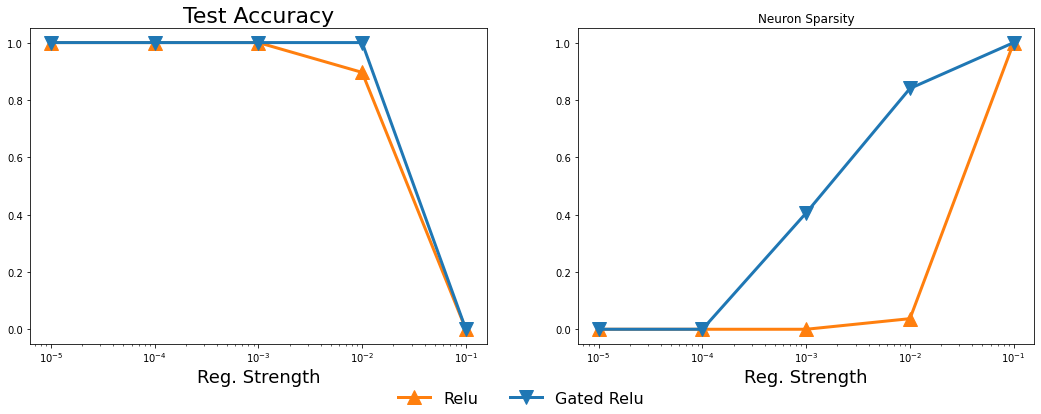

In [19]:
# Plot Results

fig = plt.figure(figsize=(18,6))
spec = fig.add_gridspec(ncols=2, nrows=1)
ax0 = fig.add_subplot(spec[0, 0])

ax0.plot(np.flip(lambda_path), 
         np.flip(relu_accuracies), 
         label="Relu", 
         color="#ff7f0e",
         marker="^",
         markevery=1,
         markersize=14,
         linewidth="3")

ax0.plot(np.flip(lambda_path), 
         np.flip(gated_accuracies), 
         label="Gated Relu", 
         color="#1f77b4",
         marker="v", 
         markevery=1,
         markersize=14,
         linewidth="3")

ax0.set_title("Test Accuracy", fontsize=22)
ax0.set_xlabel("Reg. Strength", fontsize=18)
ax0.set_xscale("log")

ax1 = fig.add_subplot(spec[0, 1])

ax1.plot(np.flip(lambda_path), 
         np.flip(relu_sparsities), 
         label="Relu", 
         color="#ff7f0e",
         marker="^",
         markevery=1,
         markersize=14,
         linewidth="3")

ax1.plot(np.flip(lambda_path), 
         np.flip(gated_sparsities), 
         label="Gated Relu", 
         color="#1f77b4",
         marker="v", 
         markevery=1,
         markersize=14,
         linewidth="3")

ax1.set_title("Neuron Sparsity")
ax1.set_xlabel("Reg. Strength", fontsize=18)
ax1.set_xscale("log")
handles, labels = ax0.get_legend_handles_labels()
legend = fig.legend(
    handles=handles,
    labels=labels,
    loc="lower center",
    borderaxespad=0.1,
    fancybox=False,
    shadow=False,
    ncol=2,
    fontsize=16,
    frameon=False,
)
fig.subplots_adjust(
    bottom=0.15,
)